In [141]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")


In [142]:
df = pd.read_csv("pokemon.csv")

In [143]:
df.shape

(1045, 8)

In [144]:
df.isna().sum()

Name          0
Total         0
HP            0
Attack        0
Defence       0
Sp_attack     0
Sp_defence    0
Speed         0
dtype: int64

In [145]:
df.head()

,Name,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,Mega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1045 non-null   object
 1   Total       1045 non-null   int64 
 2   HP          1045 non-null   int64 
 3   Attack      1045 non-null   int64 
 4   Defence     1045 non-null   int64 
 5   Sp_attack   1045 non-null   int64 
 6   Sp_defence  1045 non-null   int64 
 7   Speed       1045 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 65.4+ KB


Nous pouvons voir que nous avons que des variables continues à l'exception du nom.

In [147]:
df.nunique()

Name          1035
Total          216
HP             103
Attack         123
Defence        114
Sp_attack      119
Sp_defence     107
Speed          127
dtype: int64

Nous pourrions peut etre trouver une relation entre le nom et le total (peut etre certaines lettre, longueur, phonétique...) mais nous décidons de supprimer la variable nom.

In [148]:
df = df.drop(["Name"], axis=1)
df.shape

(1045, 7)

In [149]:
labels = [k for k in df.head().keys()]
print(labels)

['Total', 'HP', 'Attack', 'Defence', 'Sp_attack', 'Sp_defence', 'Speed']


In [150]:
def plot_caracteristic_on_barre(label, df):
    ax = df[label].value_counts(normalize=False).plot.bar(title=f"Caractéritsique {label}")
    ax.set_xlabel(f"Nombre de pokemon possédant {label}")
    ax.set_ylabel(f"Score {label}")
    ax.xaxis.set_ticks([])
    plt.grid(True)
    plt.show()
    return ax

## Répartition des pokémons possédant la caractéristique.

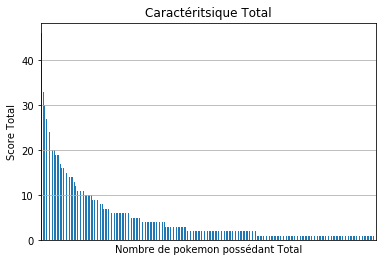

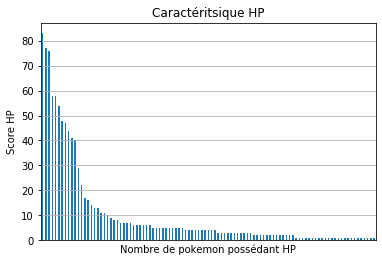

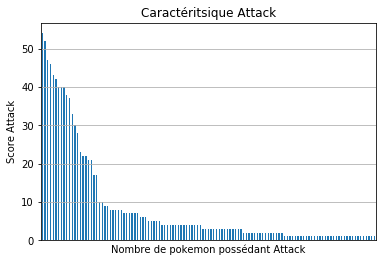

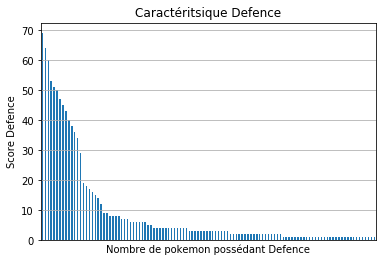

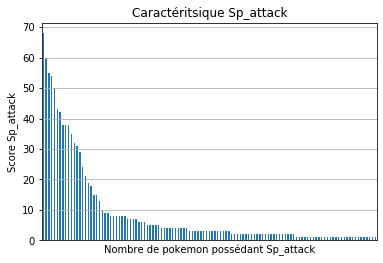

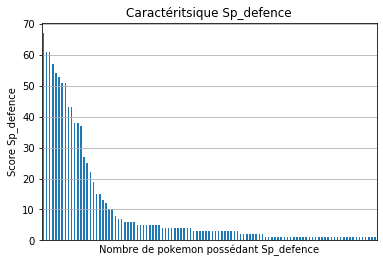

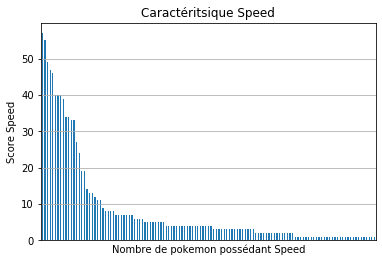

In [151]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 2000px!important; }</style>"))
graphs = [plot_caracteristic_on_barre(label, df) for label in labels]

In [152]:
df.describe()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656
std,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [153]:
df.head()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


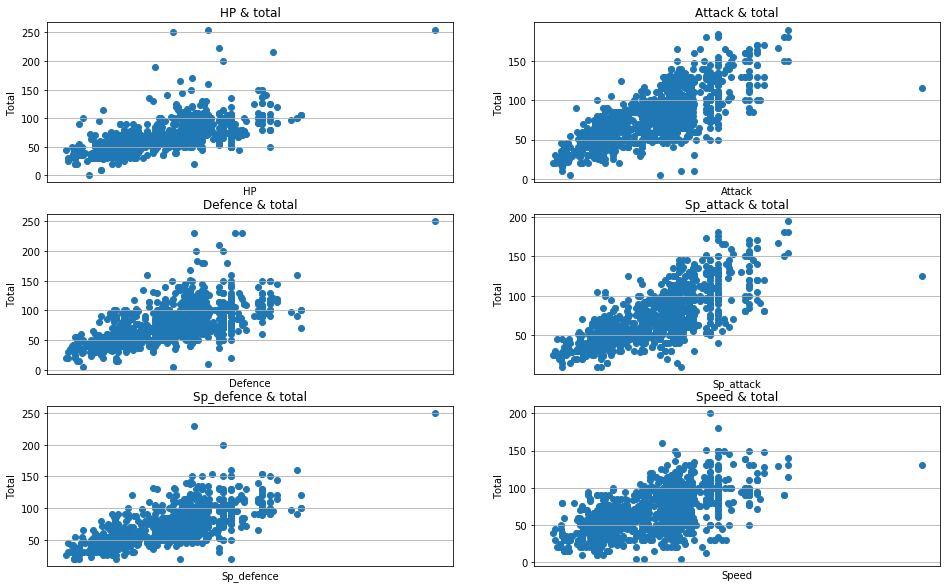

In [154]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(16, 10))

c = 1
for ax in axes:

    for n in range(2):

        x = df["Total"]
        y = df[labels[c]]

        ax[0 if n % 2 == 0 else 1].grid(True)
        
        ax[0 if n % 2 == 0 else 1].set_title(f"{labels[c]} & total")
        ax[0 if n % 2 == 0 else 1].xaxis.set_ticks([])
        ax[0 if n % 2 == 0 else 1].set_ylabel('Total')
        ax[0 if n % 2 == 0 else 1].set_xlabel(labels[c])

        ax[0 if n % 2 == 0 else 1].scatter(x,y)

    
        c+=1

## Hypothèse

Nous pouvons voir quelques points en dehors du nuage de point. Nous pouvons aussi dire que le total est corrélé à la statistique du pokémon de manière linéaire.

Nous pouvons établir notre hypothèse. Le phénome peut se décrire à l'aide du fonction linéaire.

## Etalement des caractéristiques des pokémons.

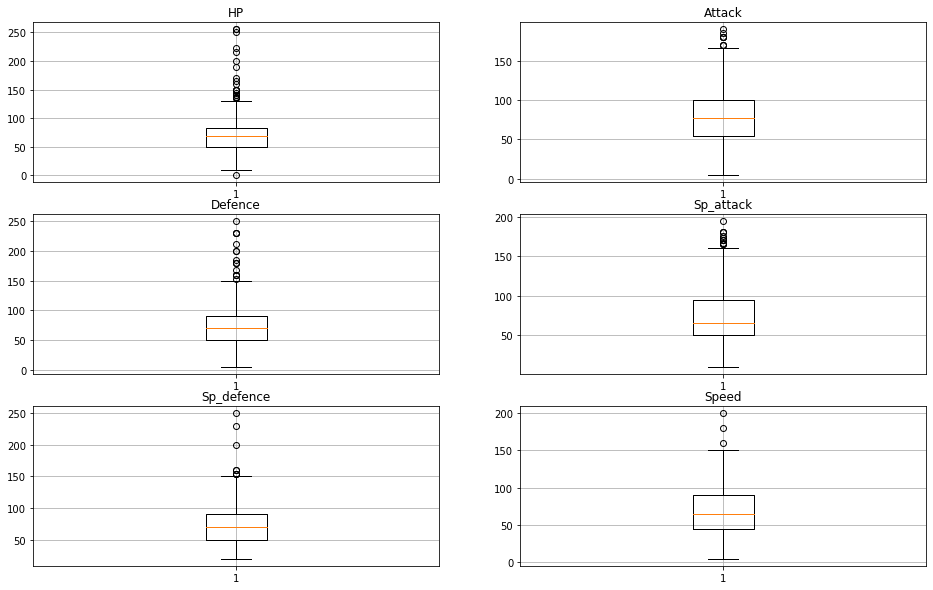

In [155]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(16, 10))

c = 1
for ax in axes:

    for n in range(2):

        x = df[labels[c]]
        ax[0 if n % 2 == 0 else 1].grid(True)
        ax[0 if n % 2 == 0 else 1].set_title(labels[c])
        ax[0 if n % 2 == 0 else 1].boxplot(x)

        c+=1

Nous remarquons qu'il y a beaucoup de données extrèmes.

In [156]:
df.describe()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,439.314833,70.067943,80.466986,74.661244,73.022010,72.288995,68.807656
std,121.970701,26.671411,32.413665,31.237903,32.724797,28.074148,30.210094
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,458.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000
75%,515.000000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


## Distribution des caractéristiques

Text(0, 0.5, '')

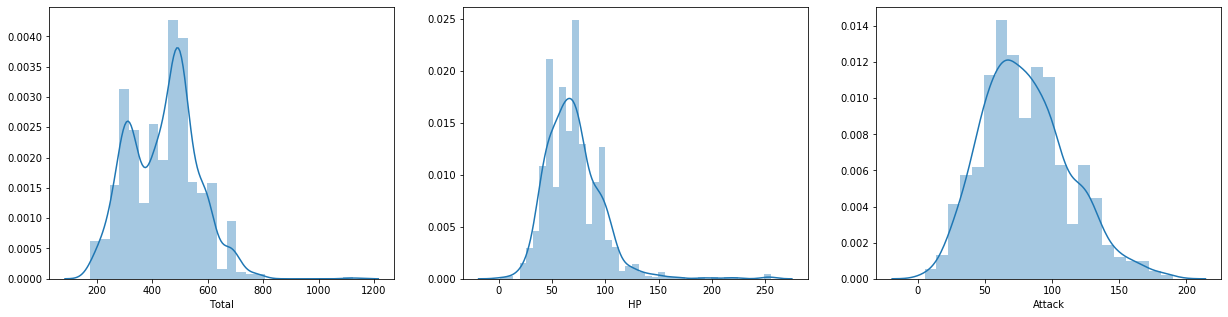

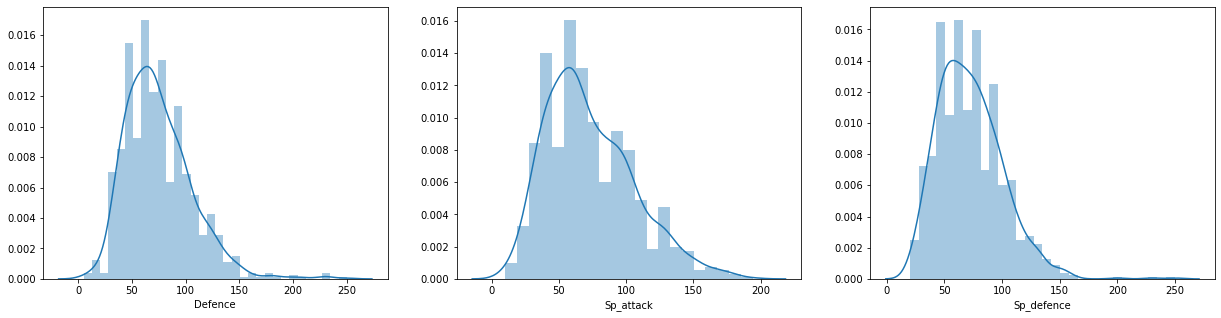

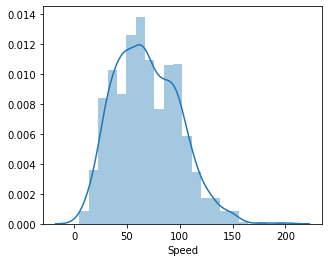

In [157]:
fig, axs = plt.subplots(ncols=3, figsize=(21, 5))

sns.distplot(df[labels[0 ]], ax=axs[0]).set_ylabel('')
sns.distplot(df[labels[1]], ax=axs[1]).set_ylabel('')
sns.distplot(df[labels[2]], ax=axs[2]).set_ylabel('')

fig, axs = plt.subplots(ncols=3, figsize=(21, 5))

sns.distplot(df[labels[3]], ax=axs[0]).set_ylabel('')
sns.distplot(df[labels[4]], ax=axs[1]).set_ylabel('')
sns.distplot(df[labels[5]], ax=axs[2]).set_ylabel('')


fig, axs = plt.subplots(ncols=1, figsize=(5, 4))
sns.distplot(df[labels[-1]]).set_ylabel('')

In [158]:
df.head()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


## Corrélations des valeurs numériques

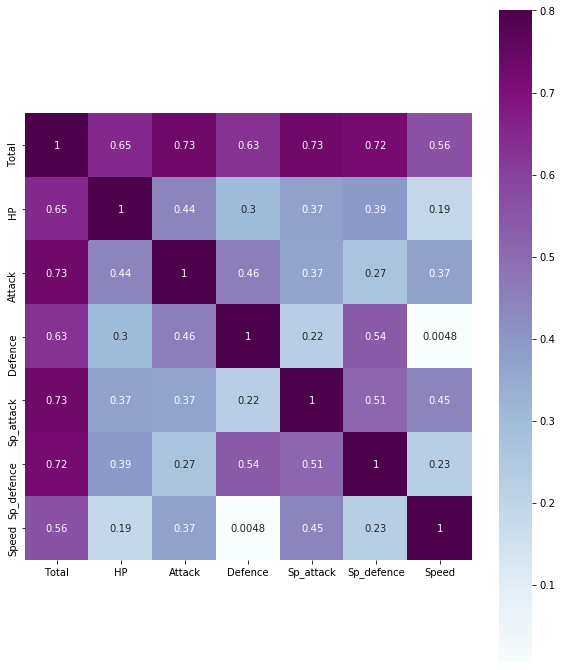

In [159]:
matrix=df.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu", annot=True)

- Il semble que le total des pokémons est très corrélé avec l'attaque, la sp attack et la sp defence.

- Il semble que la defence est corrélé avec la Sp defence.

- Il semble que Sp attack est corrélé avec la Sp defence.

- Il semble qu'un bon pokémon est un pokémon ayant de très bonne caractéristique dépende de: l'attaque, la sp attack et la sp defence

In [160]:
df.corr()

,Total,HP,Attack,Defence,Sp_attack,Sp_defence,Speed
Total,1.000000,0.650805,0.733256,0.629798,0.732996,0.720227,0.561562
HP,0.650805,1.000000,0.444125,0.300300,0.371534,0.393311,0.189705
Attack,0.733256,0.444125,1.000000,0.457671,0.368751,0.267633,0.374018
Defence,0.629798,0.300300,0.457671,1.000000,0.223481,0.544191,0.004756
Sp_attack,0.732996,0.371534,0.368751,0.223481,1.000000,0.511980,0.445640
Sp_defence,0.720227,0.393311,0.267633,0.544191,0.511980,1.000000,0.226861
Speed,0.561562,0.189705,0.374018,0.004756,0.445640,0.226861,1.000000


# Construction du model de prédiction

In [161]:
copy_of_df = df.copy()

In [176]:
y = df.Total
X = df.drop(["Total"], axis=1)
len(X), len(y)

(1045, 1045)

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
k_fold = KFold(10)

In [186]:
models_score_dico = {}

Il semble que nous ayons un phénomène linéaire de type régréssion.

Nous avons - de 100 000 points et des données normales

1) régression linéaire

    a)
        - fonction cout erreur quadrique moyenne.
        - algo minimisation descente de gradient.
    b)
        - Lasso
        - Ridge
        - Elastic Net

2) Knn

3) linearSum

4) logisticReg

5) naive Bayses

6) Svm kernel linéaire (peu de donnée)

# Régression linéaire.

## Régression linéaire sans pénalité.

In [190]:
from sklearn.linear_model import LinearRegression

In [192]:
# Construction + entrainement du modele.
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [193]:
# Score de notre modèle.
score_train = reg.score(X_train, y_train)
score_test = reg.score(X_test, y_test)

In [202]:
# Cross validation avec un Kfold
score_kfold = cross_val_score(LinearRegression(), X_train, y_train, cv=k_fold)

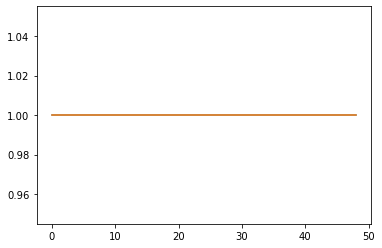

In [208]:
# Et avec une visualisation.
plt.plot([cross_val_score(LinearRegression(k), X_train, y_train, cv=5).mean() for k in range(1, 50)])
plt.plot([cross_val_score(LinearRegression(k), X_test, y_test, cv=5).mean() for k in range(1, 50)])

In [199]:
# Affichage de nos scores.
print("Score tain:", score_train)
print("Score test:", score_test)
print("")
print("Score avec un kfold:", score_kfold)
print("Moyenne du kfold:", score_kfold.mean())

Score tain: 1.0
Score test: 1.0

Score avec un kfold: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Moyenne du kfold: 1.0


In [198]:
models_score_dico["linear"] = score_test
models_score_dico["linear kfold"] = score_kfold.mean()

L'hypothèse du phénomène linéaire est accepté. Nous ne testerons pas d'autres models.